In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/WITS-Partner (1).csv',encoding='latin-1')
df

In [ ]:
!echo "deb http://downloads.skewed.de/apt focal main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard
!apt-get install libcairo2-dev
!pip install pycairo
!sudo echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!sudo apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!sudo apt-get update
!sudo apt-get install python3-graph-tool python3-matplotlib
!sudo ln -s /usr/lib/python3/dist-packages/gi/_gi.cpython-{36m,37m}-x86_64-linux-gnu.so

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from graph_tool.all import *

In [ ]:
g = Graph(directed=True)

In [ ]:
vlist=g.add_vertex(219)
g

In [ ]:
graph_draw(g)

In [ ]:
print(list(vlist))

In [ ]:
v_prop = g.new_vertex_property("string")
for i in range (1,219):
  v_prop[g.vertex(i)]=df.iloc[i-1,1]
v_prop[g.vertex(0)]='India'
graph_draw(g, vertex_text=v_prop)

In [ ]:
elist=[]
for i in range(1,219):
  elist.append((0,i))
  elist.append((i,0))
e=g.add_edge_list(elist)
graph_draw(g, vertex_text=v_prop)

Betweenness Centrality

In [ ]:
vertex_betweenness,edge_betweeness=graph_tool.centrality.betweenness(g)

In [ ]:
print(list(vertex_betweenness))

In [ ]:
print(list(edge_betweeness))

Eigenvector Centrality

In [ ]:
import scipy

In [ ]:
m = adjacency(g)
ee, x = scipy.sparse.linalg.eigs(m, k=1)
print(ee,x)

Minimum spanning tree

In [ ]:
tree_map=graph_tool.topology.min_spanning_tree(g)

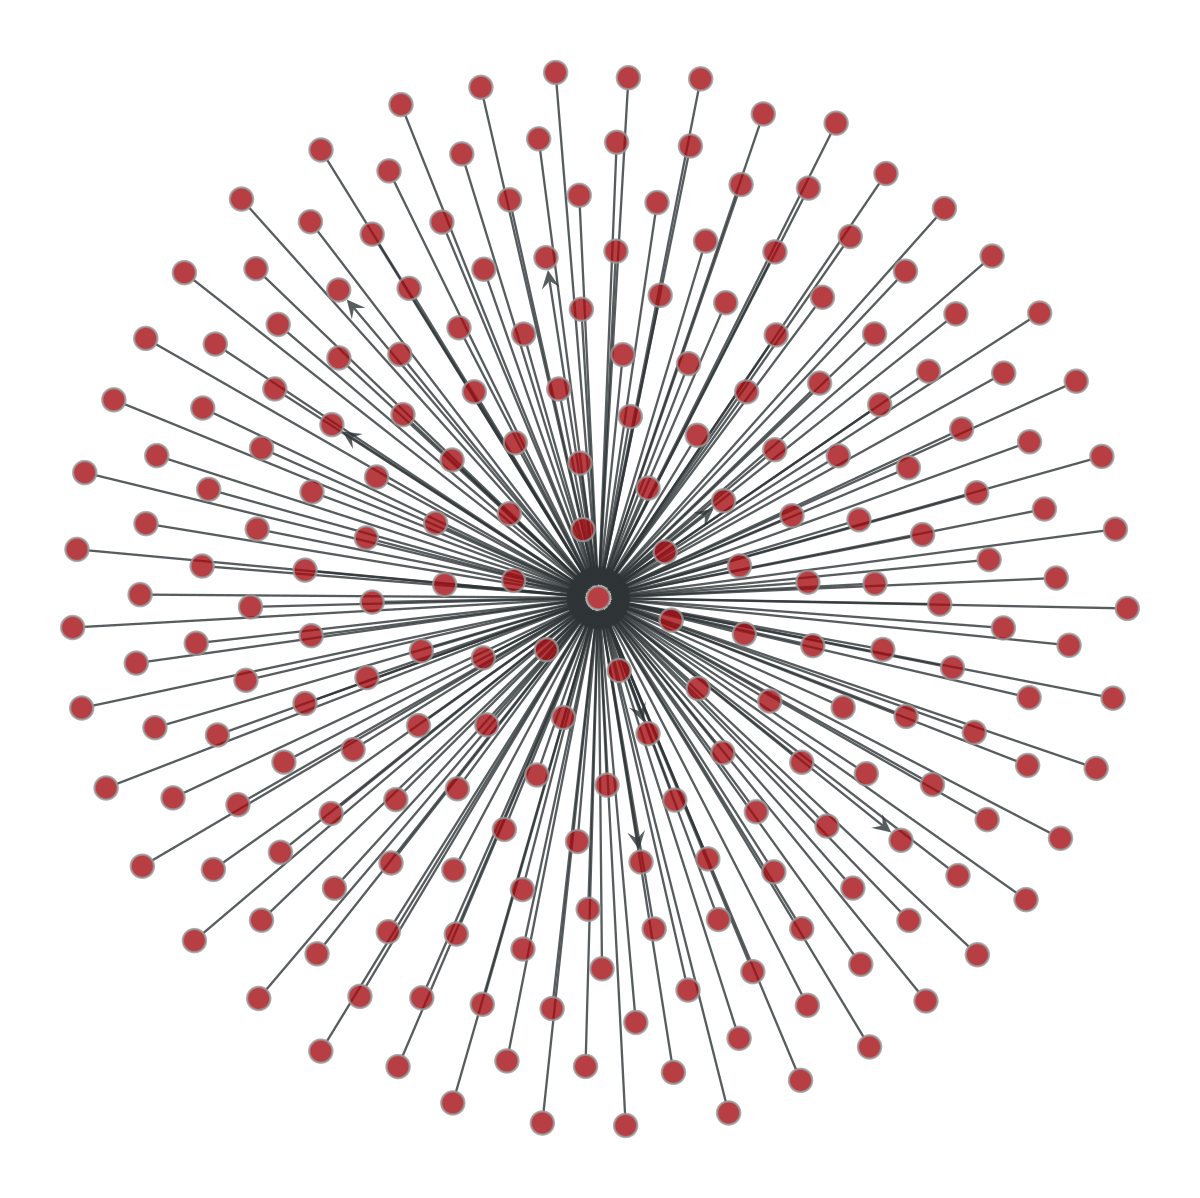

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f72283010, at 0x7f9f72211150>

In [ ]:
t=graph_tool.GraphView(g,efilt=tree_map)
graph_draw(t)

Strongly connected components

In [ ]:
comp,hist=graph_tool.topology.label_components(g)
print(list(comp))
print(hist)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[219]


Weakly Connected Components- Do not exist in this graph since all nodes are reachable from every other node

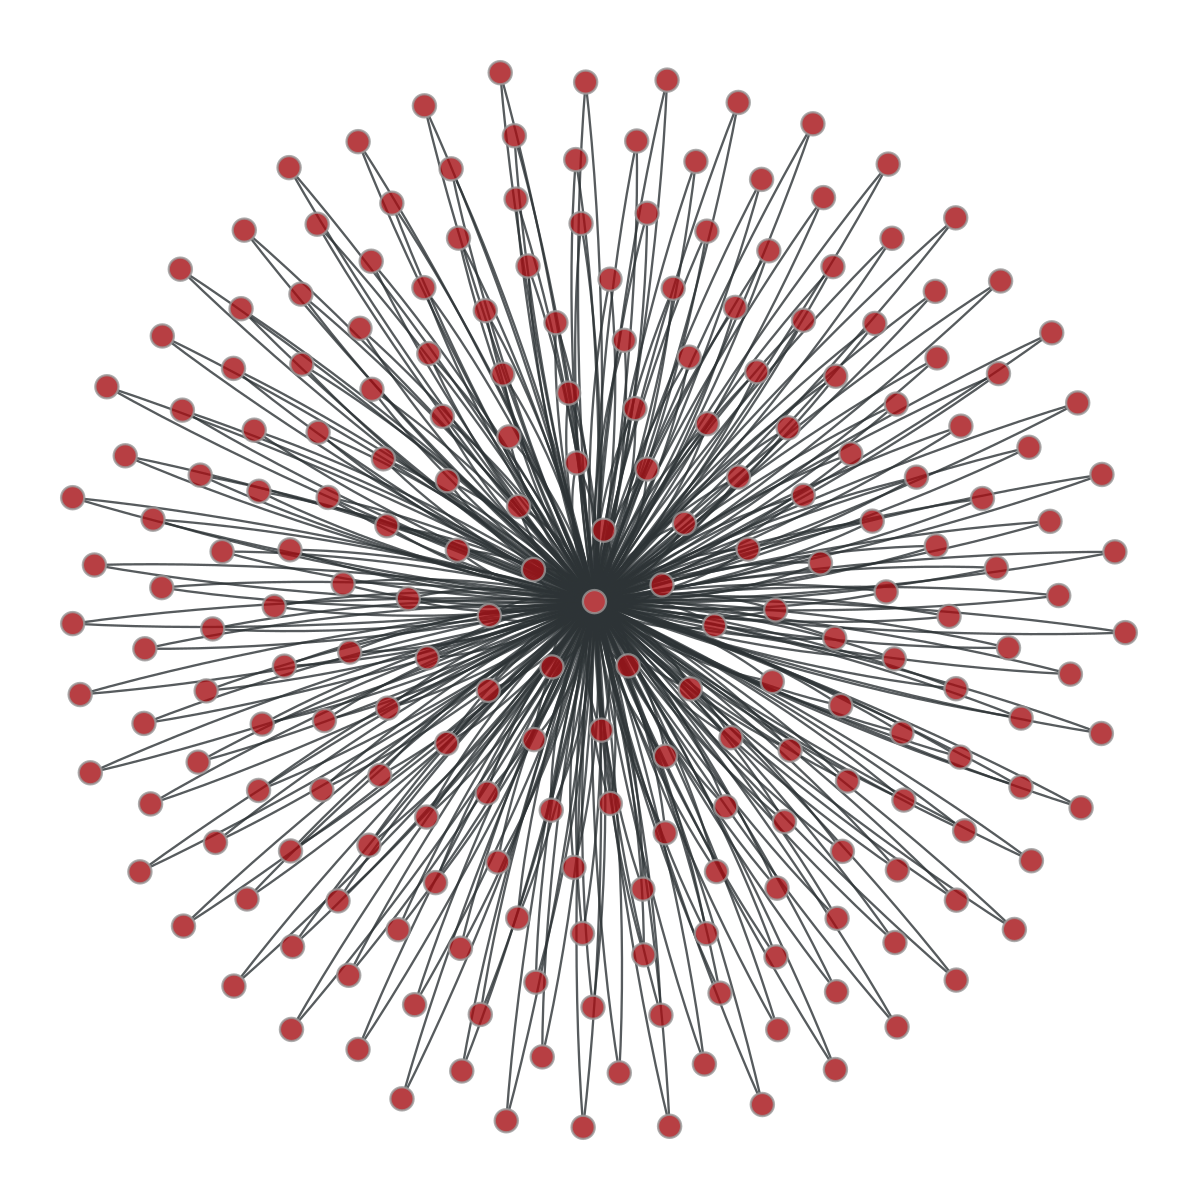

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f722880d0, at 0x7f9f72210a30>

In [ ]:
undirected_g=graph_tool.Graph(directed=False)
undirected_g=g
undirected_g.set_directed(False)
graph_draw(undirected_g)

In [ ]:
comp, hist=graph_tool.topology.label_components(g)
print(comp.a)
print(hist)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[219]


Drawing graph for only trade balance

In [ ]:
adj=np.zeros((219,219))
for i in range(219):
  if(df.iloc[i,8]>=0):
    adj[0][i]=df.iloc[i,8]
  else:
    adj[i][0]=df.iloc[i,8]
adj

array([[    4297.56,   343812.16,        0.  , ...,   343149.69,
               0.  ,   164344.75],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [-1781299.22,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       ...,
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [  -91509.68,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ]])

In [ ]:
g1 = graph_tool.Graph(directed=True)
g1.add_edge_list(np.transpose(adj.nonzero()))

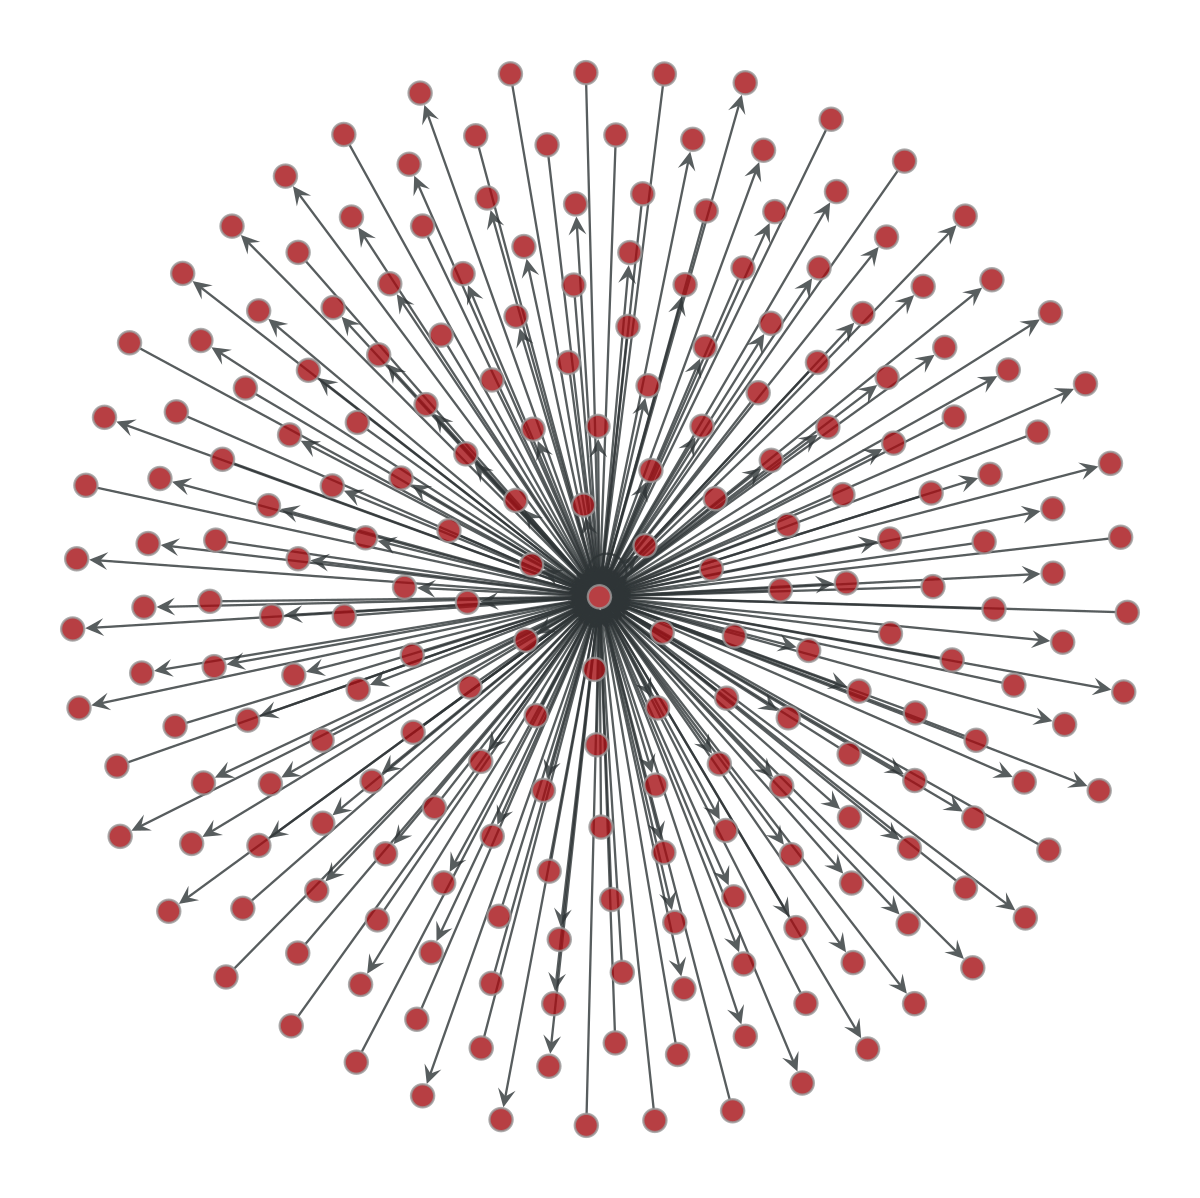

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f72212b00, at 0x7f9f90ead840>

In [ ]:
graph_draw(g1)

Betweenness Centrality

In [ ]:
vertex_betweenness,edge_betweeness=graph_tool.centrality.betweenness(g1)

In [ ]:
print(list(vertex_betweenness))

[0.2389760284107724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
print(list(edge_betweeness))

[0.0, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.0018013489170960579, 0.001

Eigenvector Centrality

In [ ]:
m = adjacency(g1)
ee, x = scipy.sparse.linalg.eigs(m, k=1)
print(ee,x)

[1.+0.j] [[-8.63868426e-02+0.j]
 [-8.63868426e-02+0.j]
 [ 6.87862293e-19+0.j]
 [-1.15239632e-16+0.j]
 [-8.63868426e-02+0.j]
 [-8.63868426e-02+0.j]
 [-4.24559866e-17+0.j]
 [ 6.31625779e-18+0.j]
 [ 1.81711833e-16+0.j]
 [ 1.08017161e-17+0.j]
 [-8.29428442e-17+0.j]
 [-8.63868426e-02+0.j]
 [-2.08624819e-17+0.j]
 [ 2.35218428e-17+0.j]
 [ 1.18701984e-16+0.j]
 [-8.63868426e-02+0.j]
 [ 7.73322241e-17+0.j]
 [-8.63868426e-02+0.j]
 [-1.03606809e-16+0.j]
 [-8.63868426e-02+0.j]
 [-8.63868426e-02+0.j]
 [-5.51793099e-17+0.j]
 [-8.63868426e-02+0.j]
 [-8.63868426e-02+0.j]
 [-1.19404942e-17+0.j]
 [-8.63868426e-02+0.j]
 [-1.60068274e-16+0.j]
 [-8.63868426e-02+0.j]
 [-8.63868426e-02+0.j]
 [-1.09901440e-16+0.j]
 [-8.63868426e-02+0.j]
 [ 1.47063899e-16+0.j]
 [-8.63868426e-02+0.j]
 [-8.63868426e-02+0.j]
 [-1.57815681e-16+0.j]
 [ 1.28983607e-16+0.j]
 [-6.60534612e-18+0.j]
 [-8.63868426e-02+0.j]
 [ 8.34856608e-17+0.j]
 [ 6.39738465e-17+0.j]
 [-8.63868426e-02+0.j]
 [-7.16903960e-17+0.j]
 [ 1.32618349e-16+0.j]
 [

Minimum spanning tree

In [ ]:
tree_map=graph_tool.topology.min_spanning_tree(g1)

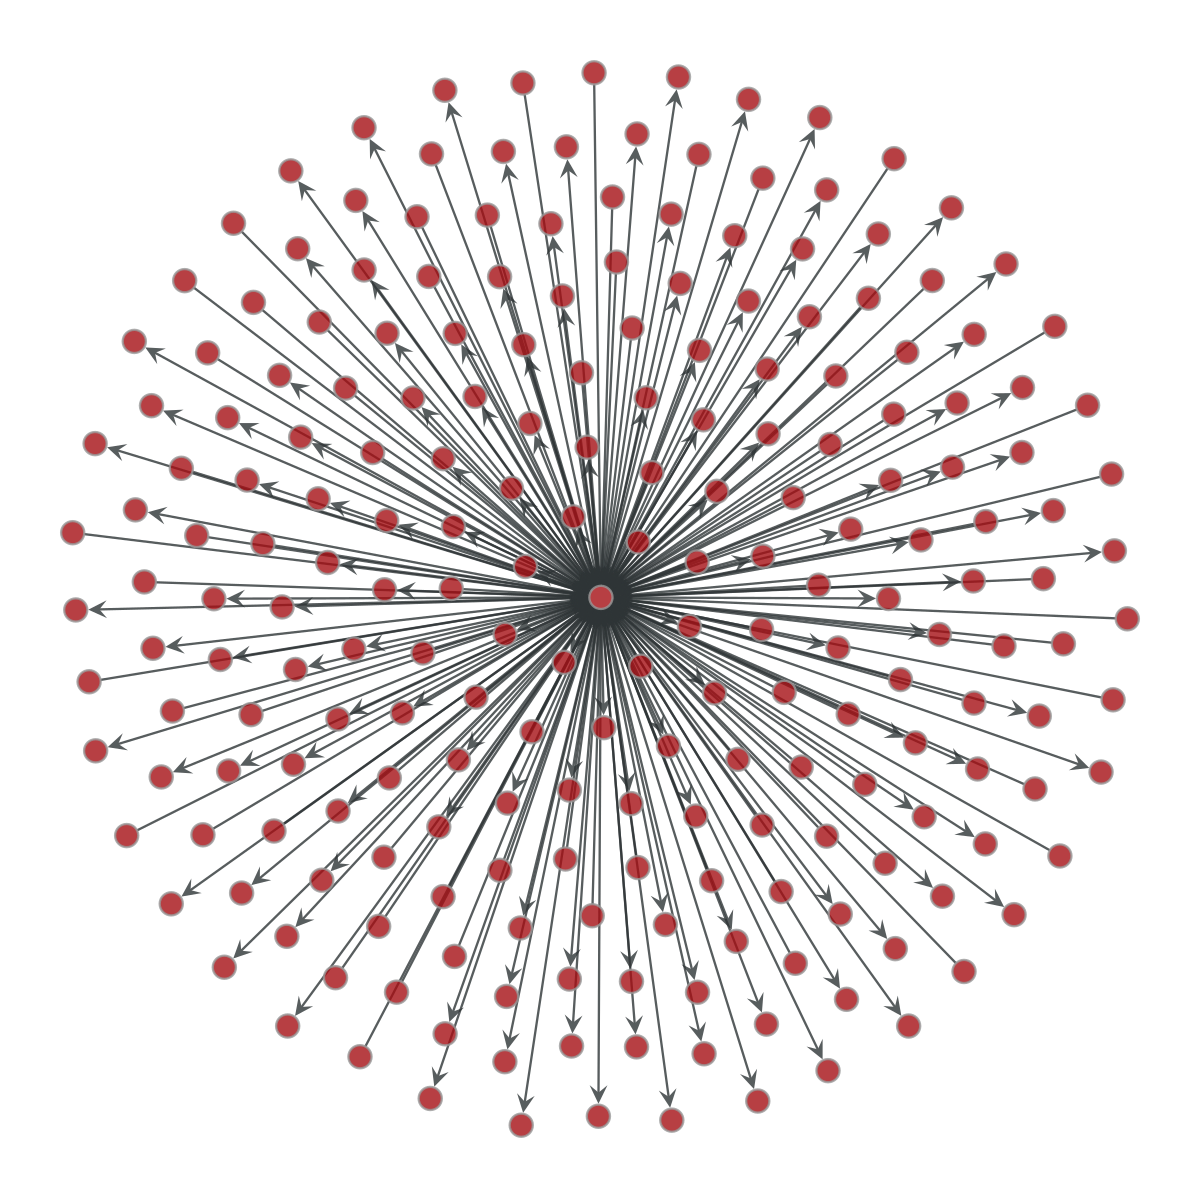

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f72280e50, at 0x7f9f72283010>

In [ ]:
t=graph_tool.GraphView(g1,efilt=tree_map)
graph_draw(t)

Strongly connected components

In [ ]:
comp, hist=graph_tool.topology.label_components(g1)
print(list(comp))
print(hist)

[133, 0, 134, 135, 1, 2, 136, 137, 138, 139, 140, 3, 141, 142, 143, 4, 144, 5, 145, 6, 7, 146, 8, 9, 147, 10, 148, 11, 12, 149, 13, 150, 14, 15, 151, 152, 153, 16, 154, 155, 17, 156, 157, 18, 19, 158, 20, 159, 21, 22, 23, 160, 24, 25, 26, 161, 162, 163, 164, 165, 27, 28, 29, 166, 30, 167, 31, 32, 168, 33, 34, 169, 35, 170, 36, 171, 172, 37, 38, 39, 40, 41, 42, 173, 43, 44, 45, 46, 174, 47, 48, 175, 49, 50, 51, 52, 176, 177, 178, 53, 54, 55, 179, 180, 56, 57, 58, 59, 60, 181, 61, 62, 182, 183, 184, 185, 186, 63, 64, 65, 187, 188, 66, 67, 68, 69, 70, 71, 189, 72, 73, 74, 75, 76, 190, 77, 78, 79, 80, 191, 192, 81, 82, 193, 83, 84, 194, 195, 85, 86, 87, 196, 88, 89, 197, 90, 91, 92, 93, 94, 198, 95, 199, 96, 97, 200, 98, 99, 201, 100, 202, 101, 102, 103, 104, 105, 203, 106, 107, 204, 108, 109, 205, 110, 111, 112, 113, 206, 114, 207, 115, 208, 116, 117, 118, 209, 119, 120, 121, 122, 210, 123, 124, 211, 125, 126, 212, 213, 214, 215, 127, 216, 128, 129, 130, 217, 131, 218, 132]
[1 1 1 1 1 1 1

Weakly connected components

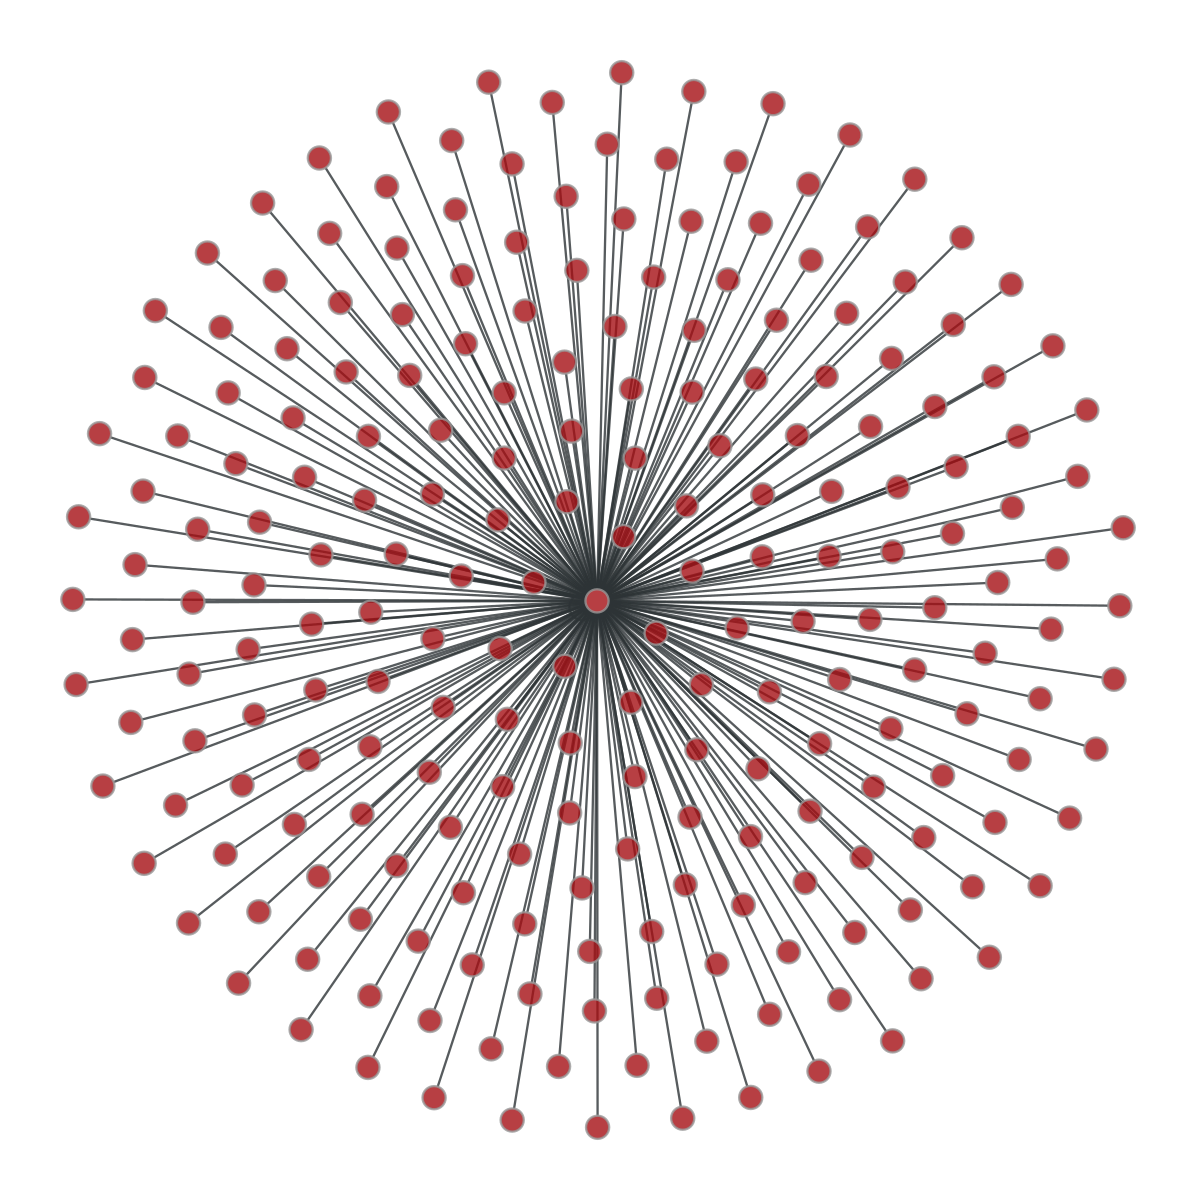

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f72212b00, at 0x7f9f72211360>

In [ ]:
undirected_g1=graph_tool.Graph(directed=False)
undirected_g1=g1
undirected_g1.set_directed(False)
graph_draw(undirected_g1)

In [ ]:
comp, hist=graph_tool.topology.label_components(g)
print(comp.a)
print(hist)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[219]


undirected

In [ ]:
adj=np.zeros((219,219))
for i in range(219):
  if(df.iloc[i,8]>=0):
    adj[0][i]=df.iloc[i,8]
  else:
    adj[i][0]=df.iloc[i,8]
adj

array([[    4297.56,   343812.16,        0.  , ...,   343149.69,
               0.  ,   164344.75],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [-1781299.22,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       ...,
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [  -91509.68,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ],
       [       0.  ,        0.  ,        0.  , ...,        0.  ,
               0.  ,        0.  ]])

In [ ]:
g2 = graph_tool.Graph(directed=False)
g2.add_edge_list(np.transpose(adj.nonzero()))

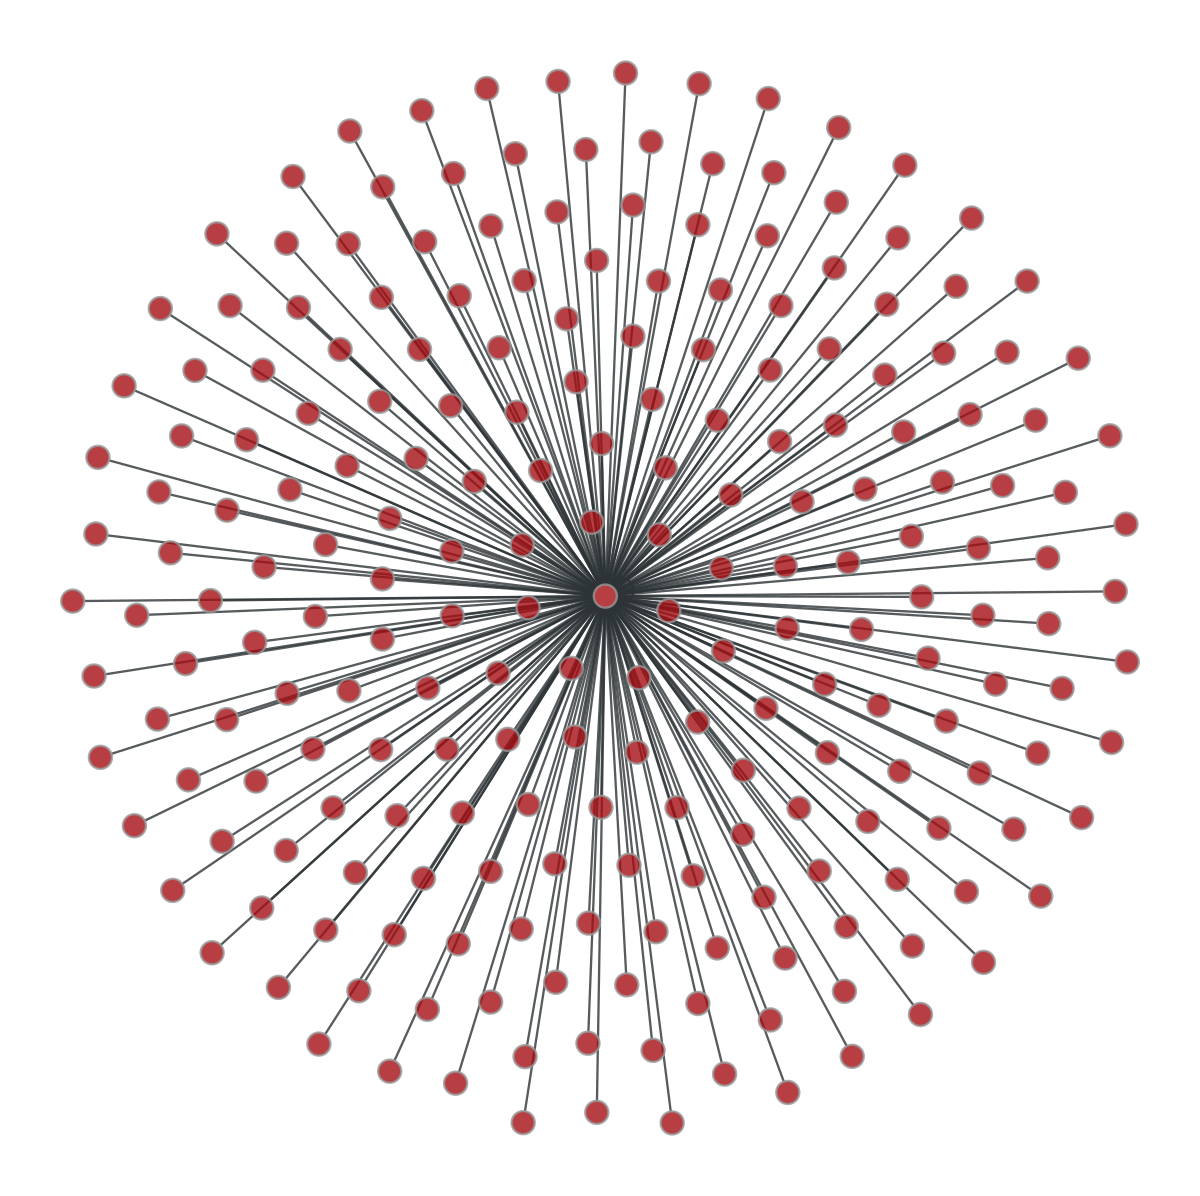

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f72211240, at 0x7f9f72213460>

In [ ]:
graph_draw(g2)

Bipartite

True


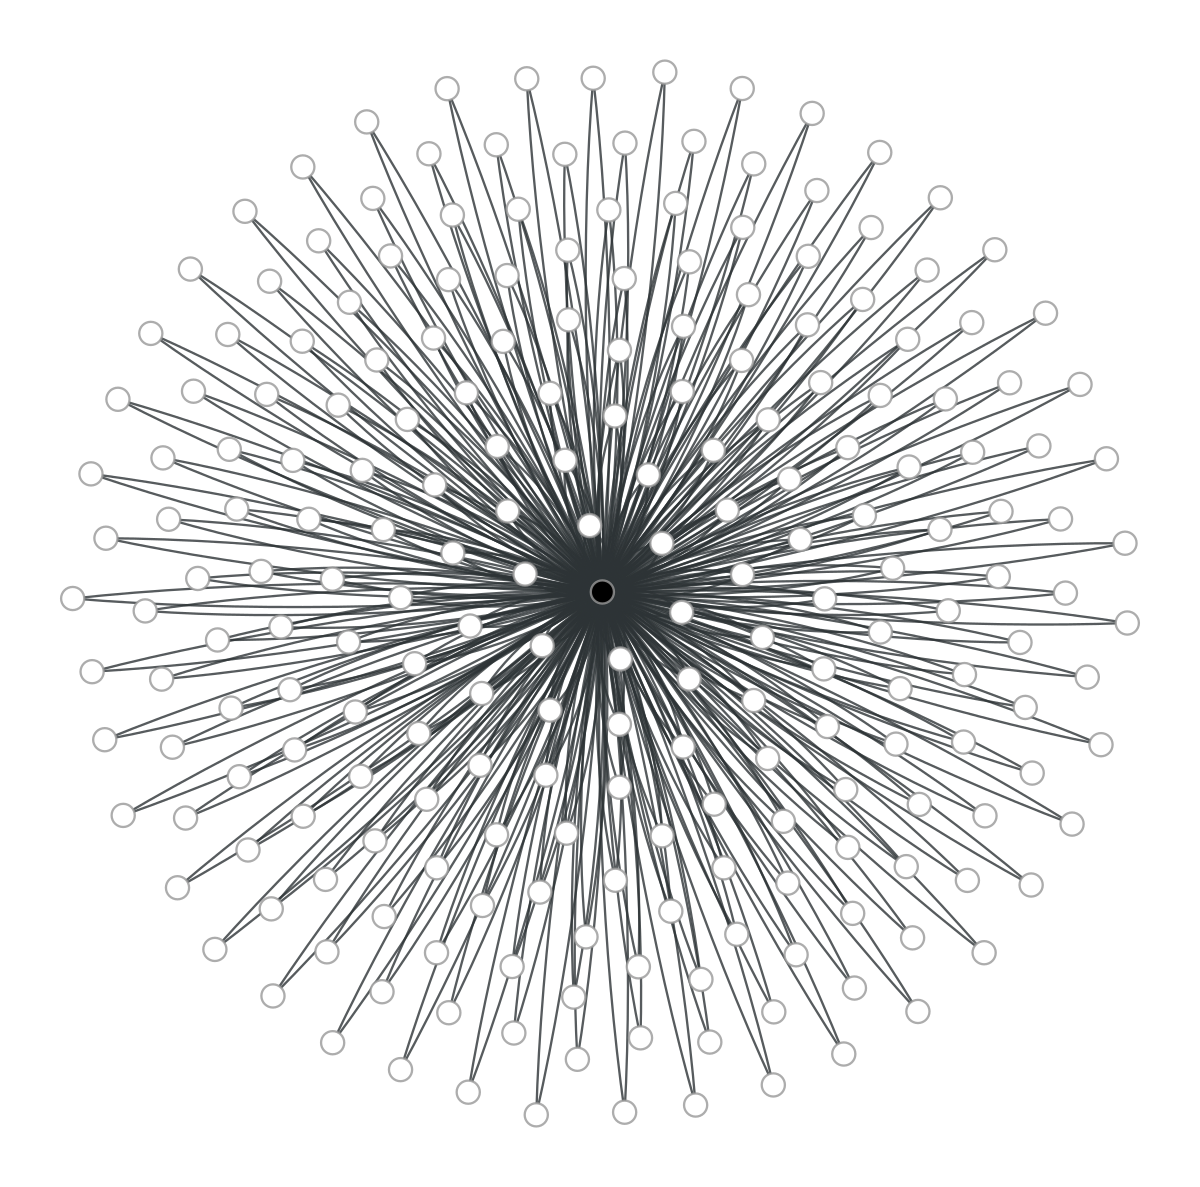

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f722880d0, at 0x7f9f722100d0>

In [ ]:
is_bi, part = graph_tool.topology.is_bipartite(g, partition=True)
print(is_bi)
graph_draw(g, vertex_fill_color=part)

False


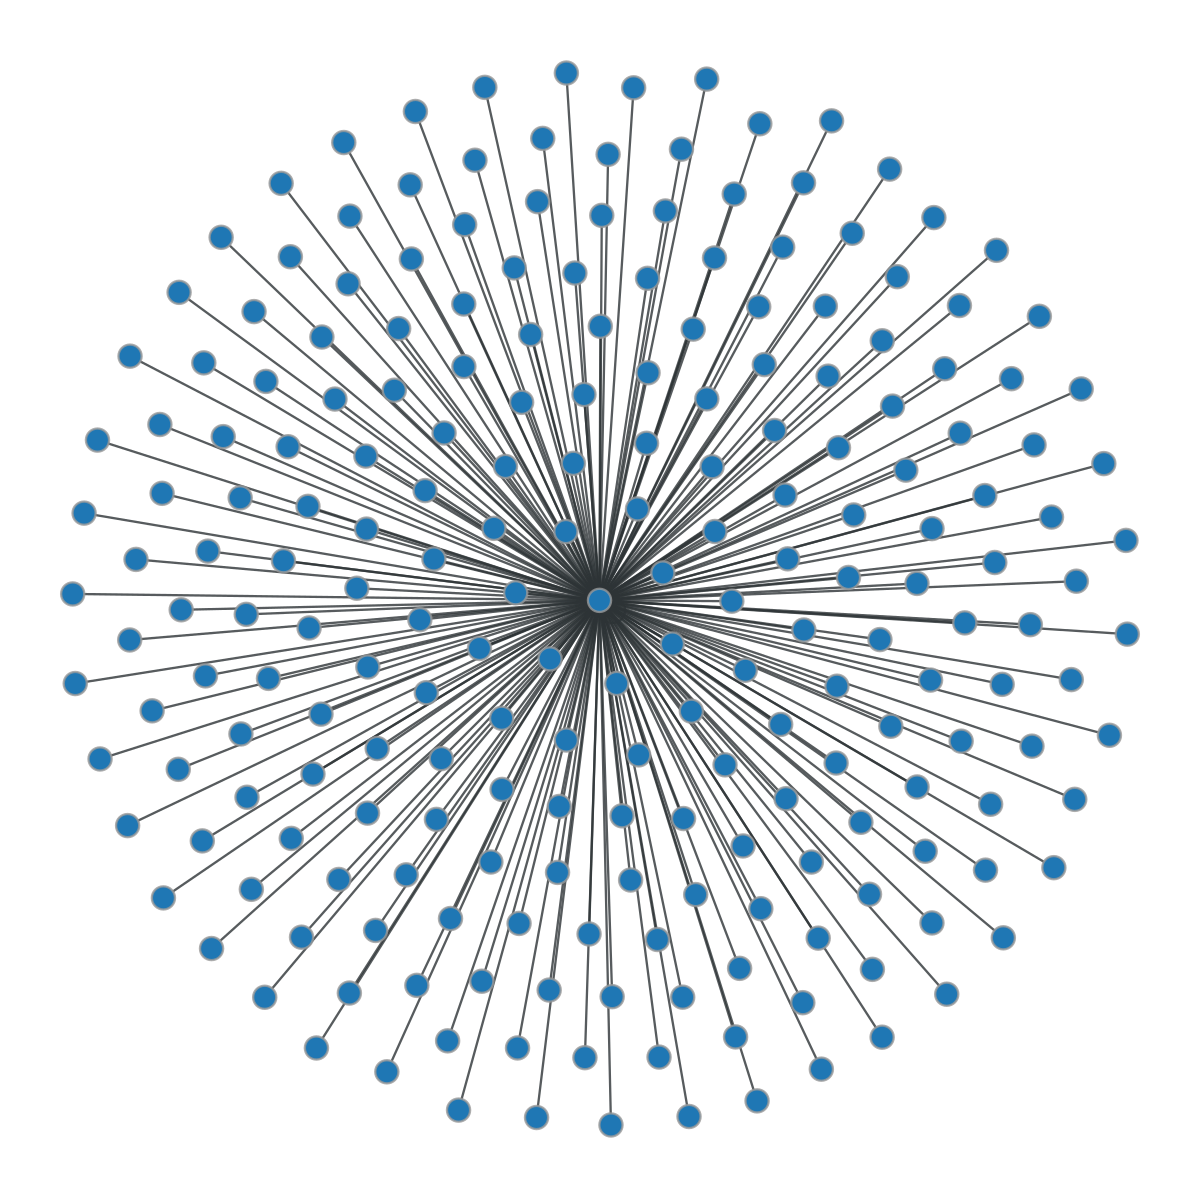

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f72212b00, at 0x7f9f722101f0>

In [ ]:
is_bi, part = graph_tool.topology.is_bipartite(g1, partition=True)
print(is_bi)
graph_draw(g1, vertex_fill_color=part)

Planar graph layout

In [ ]:
#! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
#! chmod +x miniconda.sh
#! bash ./miniconda.sh -b -f -p /usr/local
#! rm miniconda.sh
#! conda config --add channels conda-forge
#! conda install -qy mamba
#! mamba update -qy --all
#! mamba install -yq -c conda-forge graph-tool
#! mamba clean -qafy  # clean up after

#import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

## prioritize Conda libs
#import os
#os.environ['LD_LIBRARY_PATH'] = "/usr/local/lib:" + os.environ['LD_LIBRARY_PATH']

planar

INDEGREE AND OUTDEGREE

In [ ]:
indegree = g1.get_in_degrees(g1.get_vertices())


In [ ]:
outdegree = g1.get_out_degrees(g1.get_vertices())

In [ ]:
for v in g1.iter_vertices():
    print(f"Vertex {v}: Indegree={indegree[v]}, Outdegree={outdegree[v]}")

Vertex 0: Indegree=0, Outdegree=220
Vertex 1: Indegree=0, Outdegree=1
Vertex 2: Indegree=0, Outdegree=1
Vertex 3: Indegree=0, Outdegree=1
Vertex 4: Indegree=0, Outdegree=1
Vertex 5: Indegree=0, Outdegree=1
Vertex 6: Indegree=0, Outdegree=1
Vertex 7: Indegree=0, Outdegree=1
Vertex 8: Indegree=0, Outdegree=1
Vertex 9: Indegree=0, Outdegree=1
Vertex 10: Indegree=0, Outdegree=1
Vertex 11: Indegree=0, Outdegree=1
Vertex 12: Indegree=0, Outdegree=1
Vertex 13: Indegree=0, Outdegree=1
Vertex 14: Indegree=0, Outdegree=1
Vertex 15: Indegree=0, Outdegree=1
Vertex 16: Indegree=0, Outdegree=1
Vertex 17: Indegree=0, Outdegree=1
Vertex 18: Indegree=0, Outdegree=1
Vertex 19: Indegree=0, Outdegree=1
Vertex 20: Indegree=0, Outdegree=1
Vertex 21: Indegree=0, Outdegree=1
Vertex 22: Indegree=0, Outdegree=1
Vertex 23: Indegree=0, Outdegree=1
Vertex 24: Indegree=0, Outdegree=1
Vertex 25: Indegree=0, Outdegree=1
Vertex 26: Indegree=0, Outdegree=1
Vertex 27: Indegree=0, Outdegree=1
Vertex 28: Indegree=0, Outde

DENSITY

In [ ]:
import graph_tool.all as gt

In [ ]:
num_vertices = g1.num_vertices()
num_edges = g1.num_edges()
density = num_edges / (num_vertices * (num_vertices - 1))
print(f"Density: {density}")

Density: 0.0045871559633027525


CLUSTERING CO-EFFICIENT

In [ ]:
clustering_coeffs = gt.local_clustering(g1)
for v1 in g1.iter_vertices():
    print(f"Vertex {v1}: Clustering Coefficient={clustering_coeffs[v1]}")

Vertex 0: Clustering Coefficient=0.0
Vertex 1: Clustering Coefficient=0.0
Vertex 2: Clustering Coefficient=0.0
Vertex 3: Clustering Coefficient=0.0
Vertex 4: Clustering Coefficient=0.0
Vertex 5: Clustering Coefficient=0.0
Vertex 6: Clustering Coefficient=0.0
Vertex 7: Clustering Coefficient=0.0
Vertex 8: Clustering Coefficient=0.0
Vertex 9: Clustering Coefficient=0.0
Vertex 10: Clustering Coefficient=0.0
Vertex 11: Clustering Coefficient=0.0
Vertex 12: Clustering Coefficient=0.0
Vertex 13: Clustering Coefficient=0.0
Vertex 14: Clustering Coefficient=0.0
Vertex 15: Clustering Coefficient=0.0
Vertex 16: Clustering Coefficient=0.0
Vertex 17: Clustering Coefficient=0.0
Vertex 18: Clustering Coefficient=0.0
Vertex 19: Clustering Coefficient=0.0
Vertex 20: Clustering Coefficient=0.0
Vertex 21: Clustering Coefficient=0.0
Vertex 22: Clustering Coefficient=0.0
Vertex 23: Clustering Coefficient=0.0
Vertex 24: Clustering Coefficient=0.0
Vertex 25: Clustering Coefficient=0.0
Vertex 26: Clustering 

TRANSITIVITY

In [ ]:
transitivity = gt.global_clustering(g1)
print(f"Transitivity: {transitivity}")


Transitivity: (0.0, nan)


In [ ]:
clustering_coefficient1 = graph_tool.topology.local_clustering(g1, vertex=100)
print(f"Clustering Coefficient of Node 100: {clustering_coefficient1}")

AttributeError: ignored

In [ ]:


indegree = g2.get_in_degrees(g2.get_vertices())



outdegree = g2.get_out_degrees(g2.get_vertices())

In [ ]:
for v in g2.iter_vertices():
    print(f"Vertex {v}: Indegree={indegree[v]}, Outdegree={outdegree[v]}")



In [ ]:

num_vertices = g2.num_vertices()
num_edges = g2.num_edges()
density =  2num_edges / (num_vertices * (num_vertices - 1))
print(f"Density: {density}")